# Machine Learning Project - Predicting the age of the crab

## Introduction

With a background in Marine biology, I want to see if I am able to predict the age of the crab (In months) based on other metrics of the crab. The dataset was taken from Kaggle at the following URL: https://www.kaggle.com/datasets/shalfey/extended-crab-age-prediction \(_csv file size: 4mb_\)

To ensure sustainable crabbing practices, it is vital to not remove juvenile crabs form the population. Thus figuring out a way to accuratly predict the age of the crab based on various characteristics such as legnth, weight etc.

### Senario
> I have been asked by govenment body to use this data set to find a way to accuratly predict the age of their native crab species. Their end goal is to impliment legislation that prevents crabs being landed based characteristics that would be a strong indicator of their age.

## Installed Python Packages

I have installed these packages for the following reasons:
 - Pandas: This is to load the dataset and manipulate it using python. 
 - Seaborn: This is to produce scatterplots and other visuals to help identify any trends. This is also used to compare the predicted values vs the test values.
 - Matplotlib: This is to be used in a function to produce multiple graphs by running one section of code.
 - Sklearn: This is to build the model.
 - Numpy: This works in conjuction with Pandas to work through the data frames efficiantly.

In [ ]:
# numpy version: 1.23.5
!pip3 install numpy --quiet
# scikit-learn version: 1.2.2
!pip3 install scikit-learn --quiet
# seaborn version: 0.12.2
!pip3 install seaborn --quiet
# pandas version: 2.0.2
!pip3 install pandas --quiet
# matplotlib version: 3.7.1
!pip3 install matplotlib --quiet

## Imported Modules for this Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import numpy as np

## Functions Used

To help make the uploading of datasets easier and minimising the amount of repeated code.

### Function 1: <code>index_col_outliers_3sd</code>
This function was to attain the index for all rows for a specified column that would be outside of 3 Standard Deviations of the mean. This would then be use to drop them from the dataset.

```python
def index_col_outliers_3sd(dataframe, df_col):
    #To check whether the column that has been entered can be used in the function.
    if dataframe[df_col].dtype == 'O':
        print("Unable to use function on this column as it's dtype = object")
    else:
        #Get STD and mean of the column
        df_col_std = dataframe[df_col].std()
        df_col_mean = dataframe[df_col].mean()
        #Grabs index of all values that 3 standard deviations of the mean.
        df_value_rm_index = dataframe[(dataframe[df_col] < (df_col_mean - (df_col_std * 3))) |
                                      (dataframe[df_col] > (df_col_mean + (df_col_std * 3)))].index
    return df_value_rm_index
```

### Function 2: <code>give_vis_overview_sns</code>
This function is used to produce graphs for all columns you wish to compare against the chosen prediction variable. For objects, it will create a box plot. For any numeric only values it would create a scatter plot and when comparing against itself, a histogram is used. All from the Seaborn library.

```python
def give_vis_overview_sns(data, col_data, variable):
    plotdf = data
    x_variables = col_data
    print(x_variables)

    #Creates a seperate scatter plot for each value
    for i in x_variables:
        if plotdf[i].dtype == 'O':
            sns.boxplot(x= plotdf[variable], y= plotdf[i]);
            plt.title("A Seaborn box plot of the values in the column " + i + f" against the distribution of {variable}")
            plt.show()
        elif i == variable:
            sns.histplot(x= plotdf[variable]);
            plt.title("A Seaborn histogram of " + i)
            plt.show()
        else:
            sns.scatterplot(x= plotdf[i], y= plotdf[variable]);
            plt.title("A Seaborn scatter plot of " + i + f" against {variable}")
            plt.show()
```

### Function 3: <code>pred_crab_age</code>
Used in the dummy model to give a value by multiplying the weight of the crab against the height of the crab.

```python
def pred_crab_age(weight, height):
    ans = weight * height
    return ans
```

In [2]:
### -- Function 1 ---------------------------------------------------------------------------------###

def index_col_outliers_3sd(dataframe, df_col):
    #To check whether the column that has been entered can be used in the function.
    if dataframe[df_col].dtype == 'O':
        print("Unable to use function on this column as it's dtype = object")
    else:
        #Get Standard Deviation and mean of the column
        df_col_std = dataframe[df_col].std()
        df_col_mean = dataframe[df_col].mean()
        #Grabs index of all values that 3 standard deviations of the mean.
        df_value_rm_index = dataframe[(dataframe[df_col] < (df_col_mean - (df_col_std * 3))) |
                                      (dataframe[df_col] > (df_col_mean + (df_col_std * 3)))].index
    return df_value_rm_index

### -- Function 2 ---------------------------------------------------------------------------------###

def give_vis_overview_sns(data, col_data, variable):
    plotdf = data
    x_variables = col_data
    print(x_variables)

    #Creates a seperate scatter plot for each value
    for i in x_variables:
        if plotdf[i].dtype == 'O':
            #Creates a box and wiskers plot
            sns.boxplot(x= plotdf[variable], y= plotdf[i]);
            plt.title("A Seaborn box plot of the values in the column " + i + f" against the distribution of {variable}")
            plt.show()
        elif i == variable:
            #Creates a Histogram
            sns.histplot(x= plotdf[variable]);
            plt.title("A Seaborn histogram of " + i)
            plt.show()
        else:
            #Creates a Scatter plot
            sns.scatterplot(x= plotdf[i], y= plotdf[variable]);
            plt.title("A Seaborn scatter plot of " + i + f" against {variable}")
            plt.show()

### -- Function 3 ---------------------------------------------------------------------------------###

def pred_crab_age(weight, height):
    ans = weight * height
    return ans

## Data Overview and Insights

In [3]:
# Reading in the Data Frame
df = pd.read_csv("./train_extended.csv")

In [ ]:
# Looking at the fist 5 rows of the data
df.head()

In [ ]:
# Getting the number of fields and records of the data
print(df.shape)
print('Number of records: ', str(df.shape[0]))
print('Number of fields: ', str(df.shape[1]))

In [ ]:
# Get more information on the data types and number of null values in each field
df.info()

In [ ]:
# Get general statistics of the data fields
df.describe()

### Correlations

In [4]:
df_all_nums = pd.get_dummies(df,prefix=['Sex'], columns = ['Sex'], drop_first=True, dtype= int)
df_all_nums.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0,0,0,1
1,1,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0,0,1,0
2,2,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0,1,0,0
3,3,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0,0,1,0
4,4,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0,0,1,0


In [ ]:
df_all_nums.corr()


In [5]:
df_all_nums.corr()['Age'].sort_values(ascending= False)

Age               1.000000
Shell Weight      0.683784
Height            0.662558
Diameter          0.631046
Length            0.623009
Weight            0.614185
Viscera Weight    0.583556
Shucked Weight    0.503512
Sex_F             0.308421
Sex_M             0.230233
id                0.000161
Sex_I            -0.536032
Name: Age, dtype: float64

# Age Distribution

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig= px.histogram(df,
                  x= 'Age',
                  marginal= 'box',
                  color= 'Sex',
                  color_discrete_sequence=['blue', 'grey', 'pink', 'red'],
                  title= "Distribution of Age")
fig.update_layout(bargap= 0.1)
fig.show()

Quick notes:

Sex becomes more identifyable from 8-9 months.
Has a normal distribution curve.
clear outliers in the df.


### Length

In [ ]:
fig = px.scatter(df,
                 x= 'Length',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink', 'red'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Length vs. Age')

fig.update_traces(marker_size= 3)
fig.show()

## Data Cleaning

In [7]:
df_cleaned = df
index = df[(df["Sex"] == "0.025")].index

#Check the number of rows that would be removed
print("Number of outliers: " + str(len(index)))
print(index)

# Remove outliers from the DataFrame
df_cleaned = df.drop(index)
df_cleaned.shape

Number of outliers: 1
Index([125049], dtype='int64')


(199999, 10)

In [8]:
columns_to_clean = df.drop(['id', 'Sex'], axis=1).columns

# For loop to remove outliers (anything that is 3SD from the mean)
for column in columns_to_clean:
    # Gets the index of all the records where that column's value is outside 3SD of the mean
    index = index_col_outliers_3sd(df, column)
    # Removes those records from the data frame
    df_cleaned = df_cleaned.drop(index, errors= "ignore")
    # Give an output to show which fields have been cleaned
    print(f"The number of rows removed after taking out {column} are: {len(index)}")

# Printing the final shape of the cleaned data frame
print(df_cleaned.shape)

The number of rows removed after taking out Length are: 1295
The number of rows removed after taking out Diameter are: 869
The number of rows removed after taking out Height are: 488
The number of rows removed after taking out Weight are: 518
The number of rows removed after taking out Shucked Weight are: 812
The number of rows removed after taking out Viscera Weight are: 660
The number of rows removed after taking out Shell Weight are: 730
The number of rows removed after taking out Age are: 2938
(193976, 10)


## Analysis on the clean data

### General Stats

In [ ]:
df_cleaned.head()

In [ ]:
df_cleaned.info()

In [ ]:
df_cleaned.describe()

In [ ]:
df_cleaned['Age'].describe()

In [ ]:
df_cleaned['Sex'].unique()

In [9]:
df_cleaned_nums = pd.get_dummies(df_cleaned,prefix=['Sex'], columns = ['Sex'], drop_first=False, dtype= int)
df_cleaned_nums.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0,0,0,1
1,1,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0,0,1,0
2,2,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0,1,0,0
3,3,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0,0,1,0
4,4,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0,0,1,0


In [10]:
df_cleaned_nums.corr()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
id,1.000000,0.003002,0.003242,0.002895,0.002898,0.002727,0.002930,0.002963,0.001155,0.001898,-0.004655,0.002758
Length,0.003002,1.000000,0.991485,0.933187,0.945384,0.922273,0.926406,0.929969,0.639778,0.360038,-0.673312,0.317143
Diameter,0.003242,0.991485,1.000000,0.936268,0.947145,0.921100,0.926918,0.935115,0.646944,0.362851,-0.678278,0.319331
Height,0.002895,0.933187,0.936268,1.000000,0.920420,0.878708,0.902362,0.926190,0.676593,0.365041,-0.668698,0.307819
Weight,0.002898,0.945384,0.947145,0.920420,1.000000,0.971237,0.973941,0.969060,0.625361,0.364996,-0.668244,0.307416
Shucked Weight,0.002727,0.922273,0.921100,0.878708,0.971237,1.000000,0.945808,0.913932,0.521128,0.336866,-0.635312,0.301974
Viscera Weight,0.002930,0.926406,0.926918,0.902362,0.973941,0.945808,1.000000,0.940999,0.600252,0.365802,-0.662234,0.300738
Shell Weight,0.002963,0.929969,0.935115,0.926190,0.969060,0.913932,0.940999,1.000000,0.689611,0.371094,-0.668338,0.301673
Age,0.001155,0.639778,0.646944,0.676593,0.625361,0.521128,0.600252,0.689611,1.000000,0.317054,-0.556792,0.243766
Sex_F,0.001898,0.360038,0.362851,0.365041,0.364996,0.336866,0.365802,0.371094,0.317054,1.000000,-0.468832,-0.496358


In [11]:
df_cleaned_nums.corr()['Age']

id                0.001155
Length            0.639778
Diameter          0.646944
Height            0.676593
Weight            0.625361
Shucked Weight    0.521128
Viscera Weight    0.600252
Shell Weight      0.689611
Age               1.000000
Sex_F             0.317054
Sex_I            -0.556792
Sex_M             0.243766
Name: Age, dtype: float64

In [ ]:
fig_dis_age= px.histogram(df_cleaned,
                  x= 'Age',
                  marginal= 'box',
                  color= 'Sex',
                  color_discrete_sequence=['blue', 'grey', 'pink'],
                  title= "Distribution of Age")

fig_dis_age.update_layout(bargap= 0.1)
fig_dis_age.show()

In [ ]:
fig_length = px.scatter(df_cleaned,
                 x= 'Length',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Length vs. Age')

fig_length.update_traces(marker_size= 5)
fig_length.show()

In [ ]:
fig_diameter = px.scatter(df_cleaned,
                 x= 'Diameter',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Diameter vs. Age')

fig_diameter.update_traces(marker_size= 5)
fig_diameter.show()

In [ ]:
fig_height = px.scatter(df_cleaned,
                 x= 'Height',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Height vs. Age')

fig_height.update_traces(marker_size= 5)
fig_height.show()

In [ ]:
fig_weight = px.scatter(df_cleaned,
                 x= 'Weight',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Weight vs. Age')

fig_weight.update_traces(marker_size= 5)
fig_weight.show()

In [ ]:
fig_shucked_weight = px.scatter(df_cleaned,
                 x= 'Shucked Weight',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Shucked Weight vs. Age')

fig_shucked_weight.update_traces(marker_size= 5)
fig_shucked_weight.show()

In [ ]:
fig_viscera_weight = px.scatter(df_cleaned,
                 x= 'Viscera Weight',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Viscera Weight vs. Age')

fig_viscera_weight.update_traces(marker_size= 5)
fig_viscera_weight.show()

In [ ]:
fig_shell_weight = px.scatter(df_cleaned,
                 x= 'Shell Weight',
                 y= 'Age',
                 color= 'Sex',
                 color_discrete_sequence=['blue', 'grey', 'pink'],
                 opacity= 0.8,
                 hover_data= ['Sex'],
                 title= 'Shell Weight vs. Age')

fig_shell_weight.update_traces(marker_size= 5)
fig_shell_weight.show()

## Add in column: whether age is >= 12

In [12]:
df_cleaned_nums["Age>=12"] = np.where(df_cleaned_nums["Age"] >= 12, 1, 0)

## Dummy Model

In [13]:
# Actual Values
crab_weight = list(df_cleaned_nums["Weight"])
crab_height = list(df_cleaned_nums["Height"])

In [14]:
pred_list = []

for i in range(len(crab_weight)):
    prediction = pred_crab_age(crab_weight[i], crab_height[i])
    if prediction >= 12:
        pred_list.append(1)
    else:
        pred_list.append(0)

pred_list

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


In [16]:
crab_age = list(df_cleaned_nums["Age>=12"])
print(crab_age)

[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 

In [17]:
counter = 0
for i in range(len(crab_age)):
    if crab_age[i] == pred_list[i]:
        counter += 1

print(counter)

139075


In [18]:
ans = (counter / len(crab_age)) * 100

print("The Accuracy score for the dummy model is:" + str(ans) + "%")

The Accuracy score for the dummy model is:71.6970140635955%


## Creating a Logistic Model

In [20]:
y = df_cleaned_nums["Age>=12"]
X = df_cleaned_nums.drop(["Age", "id", "Age>=12"], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [25]:
y_pred = log_model.predict(scaled_X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.8371969137181448

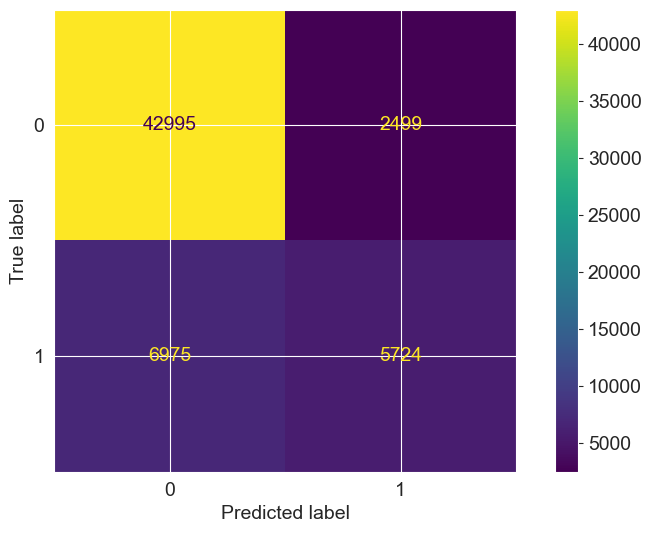

In [27]:
conf=confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=conf).plot();

## Export Cleaned Data Frame for Application

In [28]:
df_cleaned_nums.to_csv('Cleaned_train_df.csv')

## Creating a Linear Model for Crab Ages below 12 Months

In [ ]:
df_under_equal_12_months = df_cleaned_nums[(df_cleaned_nums["Age"] <= 12)]
print(df_under_equal_12_months.shape)

In [ ]:
y = df_under_equal_12_months["Age"]
X = df_under_equal_12_months.drop(["Age", "id", "Sex_I"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
lin_model = LinearRegression()

In [ ]:
lin_model.fit(scaled_X_train, y_train)
y_pred = lin_model.predict(scaled_X_test)

In [ ]:
sns.scatterplot(y=y_test, x=y_pred);

In [ ]:
print("The Mean Absolute Error is: " + str(mean_absolute_error(y_test, y_pred)))
print(f"The Mean Squared Error of the Age is: " + str(mean_squared_error(y_test, y_pred) ** 0.5))
print(f"The mean of the Age is: " + str(df_under_equal_12_months["Age"].mean()))